## Estudo dirigido de Economia Regional

1.Em quais estados brasileiros estão concentrados o emprego? Comparando com os EUA, a concentração do emprego é maior ou menor (dados disponíveis na SIDRA-IBGE RAIS e na PNAD)

2.Qual a percentagem da população brasileira, em 2018 vivia nos estados que detêm a maior parcela do emprego? Fazer um gráfico mostrando como vem sendo esta evolução de 1999 ate 2019.

3.Quais e quantos são os estados brasileiros cujo PIB per capita é inferior a 75% do PIB nacional em 2019? Qual a percentagem da população brasileira vivi nestes estados em 2019?

4.Faça um gráfico do PIB per capita das 5 macro regiões brasileiras (Norte, Nordeste, Sul, Sudeste e Centro Oeste) entre 1996 a 2021. Identifique se existiu redução da desigualdade.

5.Faça um mapa do Brasil para os itens abaixo e compare os resultados:
- taxas de desemprego
- PIB industrial per capita
 

6.Faça um mapa do Brasil para, para os itens abaixo e compare os resultados:
- Índice de Gini
- renda per capita

### Importar planilhas e tratar dados

In [37]:
# bibliotecas usadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import geopandas as gpd

In [38]:
pop_residente_regiao = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\populacao residente por regiao (1996-2021).csv', sep=';')
pop_residente_estado = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\populacao residente por estado (1999-2019).csv', sep=';')
pib_per_capita = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\pib estadual per capita (1996-2021).csv', sep=';')
pib_industrial2021 = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\pib estadual industrial 2021.csv', sep=';')
pop_empregados = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\populacao empregada (2012-2019).csv', sep=';')
taxa_desocupacao = pd.read_csv(r'M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\taxa de desocupação 2021.csv', sep=';')
indice_gini2021 = pd.read_csv(r'M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\indice de gini por estado 2021.csv', sep=';')

<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
<>:1: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:3: SyntaxWarning: invalid escape sequence '\{'
<>:4: SyntaxWarning: invalid escape sequence '\{'
<>:5: SyntaxWarning: invalid escape sequence '\{'
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_15316\2933025417.py:1: SyntaxWarning: invalid escape sequence '\{'
  pop_residente_regiao = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\populacao residente por regiao (1996-2021).csv', sep=';')
C:\Users\Maria Eduarda\AppData\Local\Temp\ipykernel_15316\2933025417.py:2: SyntaxWarning: invalid escape sequence '\{'
  pop_residente_estado = pd.read_csv('M:\{estudos}\Python\Estudos-Python\Análi

### Questões propostas

#### 1. Em quais estados brasileiros estão concentrados o emprego? Comparando com os EUA, a concentração do emprego é maior ou menor (dados disponíveis na SIDRA-IBGE RAIS e na PNAD)

In [39]:
pop_empregada_long = pop_empregados.melt(id_vars='estado', var_name='ano', value_name='pop_empregada')
pop_residente_long = pop_residente_estado.melt(id_vars='estado', var_name='ano', value_name='pop_residente')

# Limpar e converter tipos de dados
pop_empregada_long['ano'] = pop_empregada_long['ano'].astype(int)
pop_empregada_long['pop_empregada'] = pop_empregada_long['pop_empregada'].astype(str)
pop_empregada_long['pop_empregada'] = pop_empregada_long['pop_empregada'].str.replace(',', '.').astype(float)
pop_empregada_long['pop_empregada'] *= 1000

pop_residente_long['ano'] = pop_residente_long['ano'].astype(int)
pop_residente_long['pop_residente'] = pop_residente_long['pop_residente'].astype(str)
pop_residente_long['pop_residente'] = (
    pop_residente_long['pop_residente']
    .str.replace('.', '', regex=False) 
    .str.replace(',', '.', regex=False)
    .astype(float)
)

In [40]:
# Juntar os dois DataFrames por estado e ano
df_emprego = pd.merge(pop_empregada_long, pop_residente_long, on=['estado', 'ano'])

# Taxa de emprego por estado
df_emprego['taxa_emprego'] = df_emprego['pop_empregada'] / df_emprego['pop_residente']

# Concentração do emprego por estado (em % do total nacional)
total_emprego_por_ano = df_emprego.groupby('ano')['pop_empregada'].sum().reset_index(name='total_empregada')
df_emprego = df_emprego.merge(total_emprego_por_ano, on='ano')
df_emprego['concentracao_emprego'] = (df_emprego['pop_empregada'] / df_emprego['total_empregada']) * 100

df_2018 = df_emprego[df_emprego['ano'] == 2018].sort_values(by='concentracao_emprego', ascending=False)

# Estados com maior concentração de emprego
print(df_2018[['estado',  'taxa_emprego', 'concentracao_emprego', 'pop_empregada', 'pop_residente']].to_string(index=False))


             estado  taxa_emprego  concentracao_emprego  pop_empregada  pop_residente
          São Paulo      0.484684             24.364720     22072000.0     45538936.0
       Minas Gerais      0.462771             10.748427      9737000.0     21040662.0
     Rio de Janeiro      0.438463              8.305552      7524000.0     17159960.0
              Bahia      0.380892              6.228060      5642000.0     14812617.0
             Paraná      0.481455              6.031571      5464000.0     11348937.0
  Rio Grande do Sul      0.475656              5.948780      5389000.0     11329605.0
     Santa Catarina      0.507668              3.965118      3592000.0      7075494.0
         Pernambuco      0.371935              3.898885      3532000.0      9496294.0
              Ceará      0.386970              3.876808      3512000.0      9075649.0
              Goiás      0.478821              3.658240      3314000.0      6921161.0
               Pará      0.374934              3.52356

In [41]:
print(df_2018[df_2018['estado'].isin(['São Paulo', 'Minas Gerais'])])

           estado   ano  pop_empregada  pop_residente  taxa_emprego  \
181     São Paulo  2018     22072000.0     45538936.0      0.484684   
178  Minas Gerais  2018      9737000.0     21040662.0      0.462771   

     total_empregada  concentracao_emprego  
181       90590000.0             24.364720  
178       90590000.0             10.748427  


Os 5 estados brasileiros com maior concentração em 2018

In [42]:
top_5 = df_2018[['estado', 'concentracao_emprego']].copy()
top_5 = top_5.sort_values(by='concentracao_emprego', ascending=False).head(5)
top_5['concentracao_emprego'] = (top_5['concentracao_emprego']).round(3).astype(str) + '%'
print(tabulate(top_5, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════╤════════════════════════╕
│ estado         │ concentracao_emprego   │
╞════════════════╪════════════════════════╡
│ São Paulo      │ 24.365%                │
├────────────────┼────────────────────────┤
│ Minas Gerais   │ 10.748%                │
├────────────────┼────────────────────────┤
│ Rio de Janeiro │ 8.306%                 │
├────────────────┼────────────────────────┤
│ Bahia          │ 6.228%                 │
├────────────────┼────────────────────────┤
│ Paraná         │ 6.032%                 │
╘════════════════╧════════════════════════╛


De acordo com o Bareau of Labor Statistics os  5 Estados dos EUA com a maior concentração de pessoas empregadas, em relação ao total nacional, foram:
| Estado     | Empregados (milhões) | Percentual do Total Nacional |                                                                    |
| ---------- | -------------------- | ---------------------------- | ------------------------------------------------------------------ |
| Califórnia | 17,3                 | 11,8%                        |                                                                    |
| Texas      | 12,7                 | 8,7%                         |                                                                    |
| Nova York  | 9,1                  | 6,2%                         |                                                                    |
| Flórida    | 8,8                  | 6,0%                         |                                                                    |
| Illinois   | 6,1                  | 4,2%                         | 

Há uma grande concentração de emprego no Brasil em um único estado, São Paulo sozinho responde por 24,36% do total de empregados do Brasil, enquanto Califórnia, o maior nos EUA, responde por 11,8%.

Isso mostra uma maior centralização da atividade econômica e de empregos no Brasil do que nos EUA, que são mais descentralizados.

Os EUA têm uma distribuição mais equilibrada entre os estados, com os cinco maiores somando cerca de 36,9% do total nacional. Já os cinco maiores estados do Brasil concentravam, juntos, quase 60% dos empregos, segundo os dados coletados — o que revela fortes desigualdades regionais. A comparação revela um desafio importante para o Brasil: ainda há forte desigualdade na distribuição da atividade econômica e do emprego. Isso pode refletir problemas de infraestrutura, logística, formação de mão de obra, acesso a crédito, entre outros.

Apesar de São Paulo ter cerca de 21% da população brasileira, sua fatia nos empregos é maior que isso (24,36%), evidenciando sua maior capacidade de absorção de mão de obra. A Califórnia também tem o maior número populacional entre os estados americanos, mas sua participação no emprego é proporcional à sua população, o que denota maior equilíbrio entre demografia e emprego nos EUA.

#### 2. Qual a percentagem da população brasileira, em 2018 vivia nos estados que detêm a maior parcela do emprego? Fazer um gráfico mostrando como vem sendo esta evolução de 1999 ate 2019.

In [43]:
top_emprego = df_2018.sort_values(by='concentracao_emprego', ascending=False).head(5)
pop_top5 = top_emprego['pop_residente'].sum()
pop_brasil = df_2018['pop_residente'].sum()
percentual_pop_nos_top5 = (pop_top5 / pop_brasil) * 100
print(f"Cerca de {percentual_pop_nos_top5:.2f}% da população brasileira vivia nos 5 estados com maior concentração de emprego em 2018.")


Cerca de 52.71% da população brasileira vivia nos 5 estados com maior concentração de emprego em 2018.


In [44]:
pop_residente_estado.head()

,estado,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Acre,527.937,541.873,574.355,586.942,600.595,630.328,669.736,686.652,688.892,...,718.759,746.386,758.786,776.463,790.101,803.513,816.687,829.619,869.265,881.935
1,Alagoas,2.713.203,2.738.378,2.856.629,2.887.535,2.917.664,2.980.910,3.015.912,3.050.652,3.103.380,...,3.149.746,3.143.384,3.165.472,3.300.935,3.321.730,3.340.932,3.358.963,3.375.823,3.322.820,3.337.357
2,Amazonas,2.580.860,2.641.251,2.900.240,2.961.801,3.031.068,3.138.726,3.232.330,3.311.026,3.352.198,...,3.465.878,3.538.387,3.590.985,3.807.921,3.873.743,3.938.336,4.001.667,4.063.614,4.080.611,4.144.597
3,Amapá,439.781,458.796,498.735,516.511,534.835,547.400,594.587,615.715,621.162,...,655.459,684.309,698.602,734.996,750.912,766.679,782.295,797.722,829.494,845.731
4,Bahia,12.993.011,13.135.262,13.214.114,13.323.212,13.435.612,13.682.074,13.815.334,13.950.146,14.293.755,...,14.367.449,14.097.534,14.175.341,15.044.137,15.126.371,15.203.334,15.276.566,15.344.447,14.812.617,14.873.064


In [45]:
top5_estados = top_emprego['estado'].tolist()
df_top5 = pop_residente_estado[pop_residente_estado['estado'].isin(top5_estados)].copy()

anos = [str(ano) for ano in range(1999, 2020)]  

def limpar_e_converter(df, colunas):
    for ano in colunas:
        df[ano] = df[ano].str.replace('.', '', regex=False) 
        df[ano] = df[ano].str.replace(',', '.', regex=False) 
        df[ano] = df[ano].astype(float)
    return df

df_top5 = limpar_e_converter(df_top5, anos)
pop_residente_estado = limpar_e_converter(pop_residente_estado.copy(), anos)

# somar população dos 5 estados top para cada ano
pop_top5_anos = df_top5[anos].sum()

pop_total_anos = pop_residente_estado[anos].sum()
percentual_pop_top5 = (pop_top5_anos / pop_total_anos) * 100

percentual_pop_top5 = percentual_pop_top5.reset_index()
percentual_pop_top5.columns = ['Ano', 'Percentual']
percentual_pop_top5['Ano'] = percentual_pop_top5['Ano'].astype(int)


In [46]:
percentual_pop_top5.head(10)

,Ano,Percentual
0,1999,54.461719
1,2000,54.424207
2,2001,54.079023
3,2002,54.037309
4,2003,53.985103
5,2004,53.885921
6,2005,53.826988
7,2006,53.774178
8,2007,53.717233
9,2008,53.704697


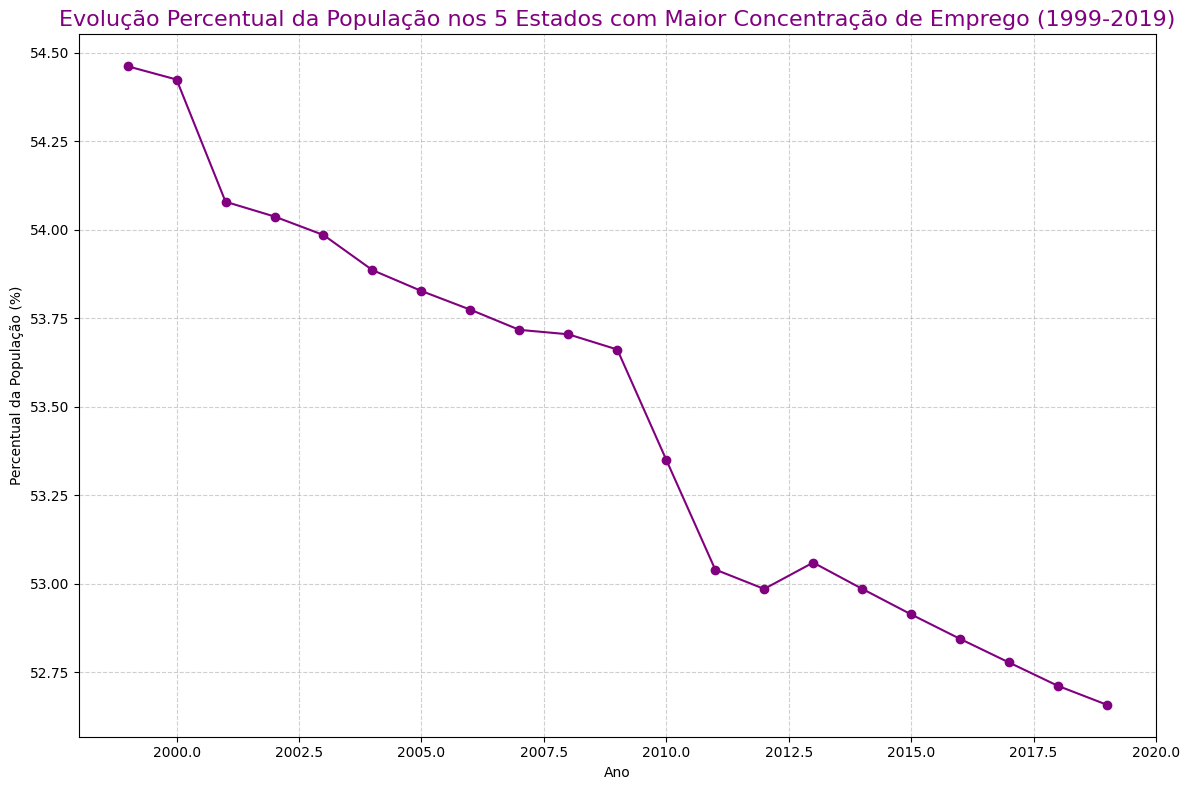

In [47]:
#plot do gráfico
plt.figure(figsize=(12, 8))
plt.plot(percentual_pop_top5['Ano'], percentual_pop_top5['Percentual'], marker='o', color = 'purple')
plt.title('Evolução Percentual da População nos 5 Estados com Maior Concentração de Emprego (1999-2019)', color='purple', fontsize=16)
plt.xlabel('Ano')
plt.ylabel('Percentual da População (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### 3. Quais e quantos são os estados brasileiros cujo PIB per capita é inferior a 75% do PIB nacional em 2019? Qual a percentagem da população brasileira vive nestes estados em 2019?

In [48]:
ano = '2019'

def converter_para_numero(df, col_ano):
    df[col_ano] = (
        df[col_ano]
        .astype(str)
        .str.replace('.', '', regex=False)   
        .str.replace(',', '.', regex=False)  
        .astype(float)                     
        .mul(1000)                           
        .astype(int)                       
    )
    return df

pib_per_capita = converter_para_numero(pib_per_capita, ano)

# Com o PIB per capita por estado, uma forma simples: média ponderada pelo população dos estados
pop_residente_estado[ano] = pd.to_numeric(pop_residente_estado[ano], errors='coerce')

# Unir PIB per capita e população por estado para 2019
df_pib_pop = pd.merge(
    pib_per_capita[['estado', ano]],
    pop_residente_estado[['estado', ano]],
    on='estado',
    suffixes=('_pib', '_pop')
)

# Calcular o PIB total por estado = PIB per capita * população
df_pib_pop['pib_total_estado'] = df_pib_pop[f'{ano}_pib'] * df_pib_pop[f'{ano}_pop']

# PIB total nacional
pib_total_nacional = df_pib_pop['pib_total_estado'].sum()

# População total nacional
pop_total_nacional = df_pib_pop[f'{ano}_pop'].sum()

# PIB per capita nacional ponderado pela população
pib_per_capita_nacional = pib_total_nacional / pop_total_nacional

print(f"PIB per capita nacional em {ano}: R$ {pib_per_capita_nacional:.2f} a preços de 2010")

PIB per capita nacional em 2019: R$ 19760.19 a preços de 2010


In [49]:
print(f'População total nacional em {ano}: {pop_total_nacional:.0f} e o pib foi de R$ {pib_total_nacional:.2f} a preços de 2010')

População total nacional em 2019: 210147125 e o pib foi de R$ 4152546910920.00 a preços de 2010


In [50]:
# Filtrar estados com PIB per capita inferior a 75% do PIB nacional
limite = 0.75 * pib_per_capita_nacional
estados_baixo_pib = df_pib_pop[df_pib_pop[f'{ano}_pib'] < limite]

# Quantidade de estados
quantidade_estados = estados_baixo_pib.shape[0]

# Soma da população desses estados
pop_estados_baixo_pib = estados_baixo_pib[f'{ano}_pop'].sum()

# Percentual da população nacional que vive nesses estados
percentual_pop = (pop_estados_baixo_pib / pop_total_nacional) * 100

print(f"\nEstados com PIB per capita inferior a 75% do PIB nacional em {ano}:")
print(estados_baixo_pib['estado'].to_list())

print(f"\nQuantidade de estados: {quantidade_estados}")
print(f"Percentual da população brasileira vivendo nesses estados em {ano}: {percentual_pop:.2f}%")


Estados com PIB per capita inferior a 75% do PIB nacional em 2019:
['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará', 'Maranhão', 'Pará', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Roraima', 'Sergipe', 'Tocantins']

Quantidade de estados: 15
Percentual da população brasileira vivendo nesses estados em 2019: 35.08%


#### 4. Faça um gráfico do PIB per capita das 5 macro regiões brasileiras (Norte, Nordeste, Sul, Sudeste e Centro Oeste) entre 1996 a 2021. Identifique se existiu redução da desigualdade.

In [51]:
regioes = {
    'Norte': ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins'],
    'Nordeste': ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe'],
    'Centro-Oeste': ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul'],
    'Sudeste': ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo'],
    'Sul': ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
}

# 2. Carregar dados do PIB per capita
pib_pc = pd.read_csv(r'M:\{estudos}\Python\Estudos-Python\Análise de Dados\Estudo dirigido - Economia regional\pib estadual per capita (1996-2021).csv', sep=';')

# 3. Corrigir vírgulas e converter colunas numéricas
anos = [str(ano) for ano in range(1996, 2022)]
for ano in anos:
    pib_pc[ano] = pib_pc[ano].str.replace('.', '').str.replace(',', '.').astype(float)

# 4. Adicionar coluna de região
def identificar_regiao(estado):
    for regiao, estados in regioes.items():
        if estado in estados:
            return regiao
    return None

pib_pc['regiao'] = pib_pc['estado'].apply(identificar_regiao)

# 5. Agrupar por região e ano: média simples
df_regional = pib_pc.groupby('regiao')[anos].mean().transpose()
df_regional.index = df_regional.index.astype(int)


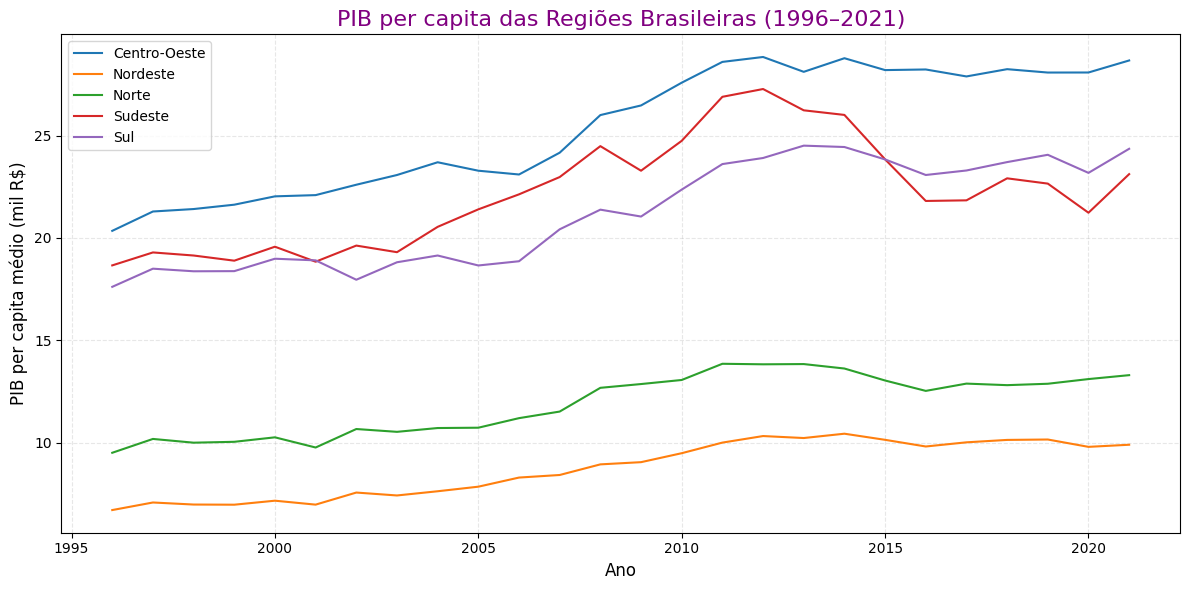

In [52]:
# 6. Plotar gráfico
plt.figure(figsize=(12, 6))
for regiao in df_regional.columns:
    plt.plot(df_regional.index, df_regional[regiao], label=regiao)

plt.title('PIB per capita das Regiões Brasileiras (1996–2021)', fontsize=16, color='purple')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('PIB per capita médio (mil R$)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


#### 5. Faça um mapa do Brasil para os itens abaixo e compare os resultados:
- taxas de desemprego
- PIB industrial per capita


##### Taxa de desemprego em 2021

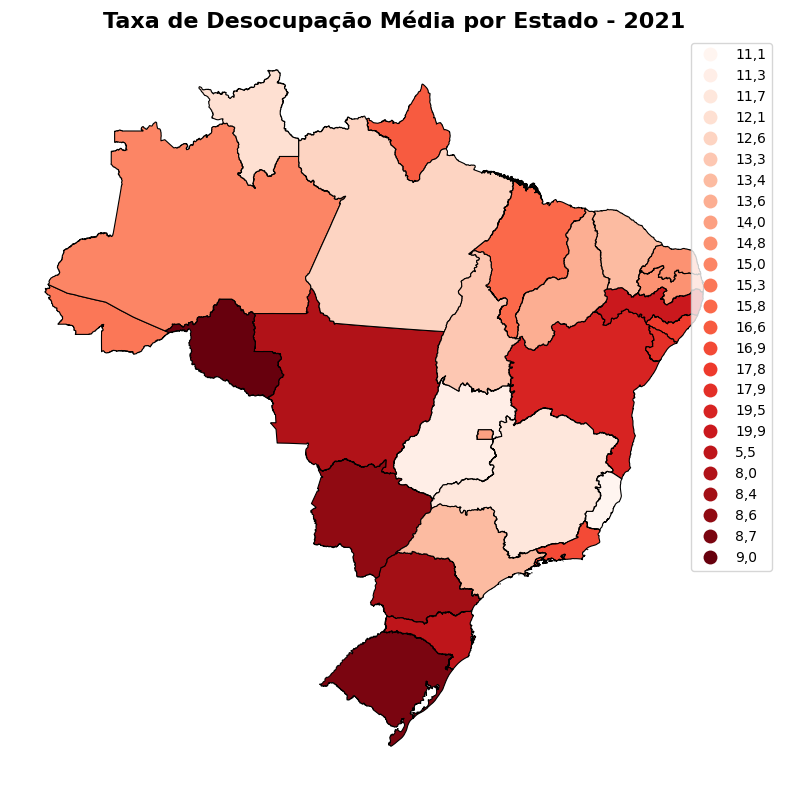

In [53]:
taxa_desocupacao['estado'] = taxa_desocupacao['estado'].str.strip()

# Carregar o shapefile com os estados brasileiros
# Você pode usar um shapefile oficial do IBGE ou usar este embutido do geopandas
brasil_estados = gpd.read_file('https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson')

# padronizar os nomes para facilitar o merge
taxa_desocupacao['estado'] = taxa_desocupacao['estado'].str.lower()
brasil_estados['name'] = brasil_estados['name'].str.lower()

# juntar os dados de desocupação com o mapa
mapa = brasil_estados.merge(taxa_desocupacao, left_on='name', right_on='estado')

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa.plot(column='2021', cmap='Reds', linewidth=0.8, edgecolor='black', legend=True, ax=ax)

ax.set_title('Taxa de Desocupação Média por Estado - 2021', fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

##### PIB industrial per capita de 2021

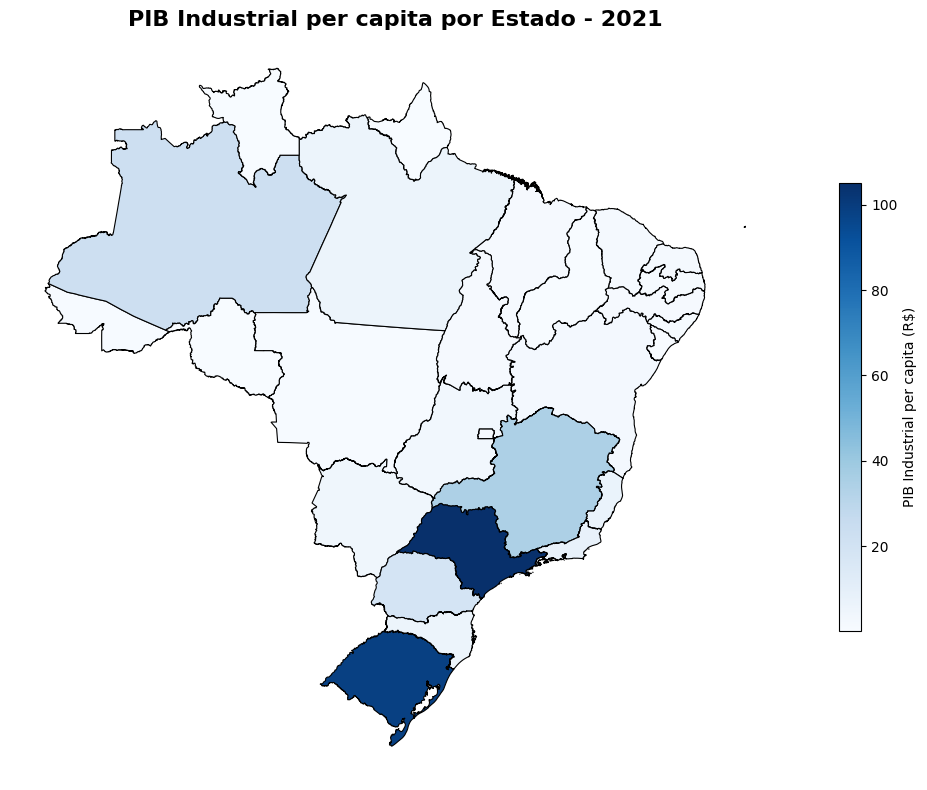

In [54]:
pib_industrial2021['estado'] = pib_industrial2021['estado'].str.strip().str.lower()

# Converte os valores da coluna "2021" para numérico (caso esteja como string com vírgula)
pib_industrial2021['2021'] = pib_industrial2021['2021'].str.replace(',', '.')
pib_industrial2021['2021'] = pd.to_numeric(pib_industrial2021['2021'], errors='coerce')
mapa = brasil_estados.merge(pib_industrial2021, left_on='name', right_on='estado')

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa.plot(column='2021', cmap='Blues', linewidth=0.8, edgecolor='black', legend=True, ax=ax,
          legend_kwds={'label': 'PIB Industrial per capita (R$)', 'shrink': 0.6})

ax.set_title('PIB Industrial per capita por Estado - 2021', fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()



#### 6. Faça um mapa do Brasil para, para os itens abaixo e compare os resultados:
- Índice de Gini
- renda per capita

##### Índice de Gini de 2021

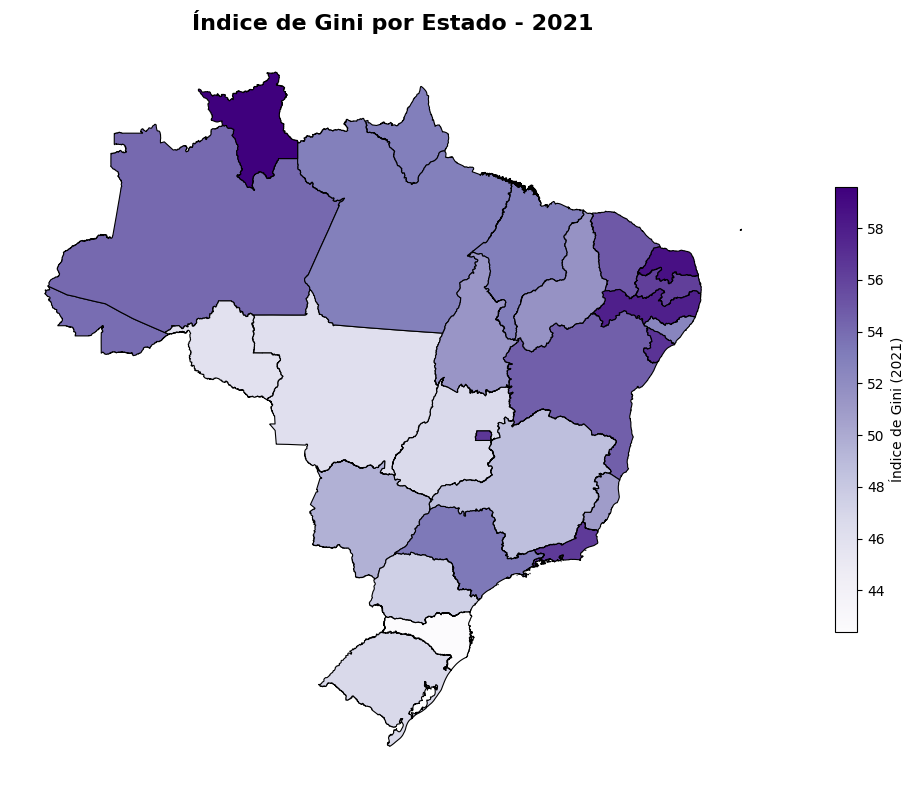

In [55]:
indice_gini2021['estado'] = indice_gini2021['estado'].str.strip().str.lower()

indice_gini2021['2021'] = indice_gini2021['2021'].str.replace('%', '').str.replace(',', '.')
indice_gini2021['2021'] = pd.to_numeric(indice_gini2021['2021'], errors='coerce')
mapa = brasil_estados.merge(indice_gini2021, left_on='name', right_on='estado')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa.plot(column='2021', cmap='Purples', linewidth=0.8, edgecolor='black', legend=True, ax=ax,
          legend_kwds={'label': 'Índice de Gini (2021)', 'shrink': 0.6})

ax.set_title('Índice de Gini por Estado - 2021', fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()

##### Renda per capita de 2021

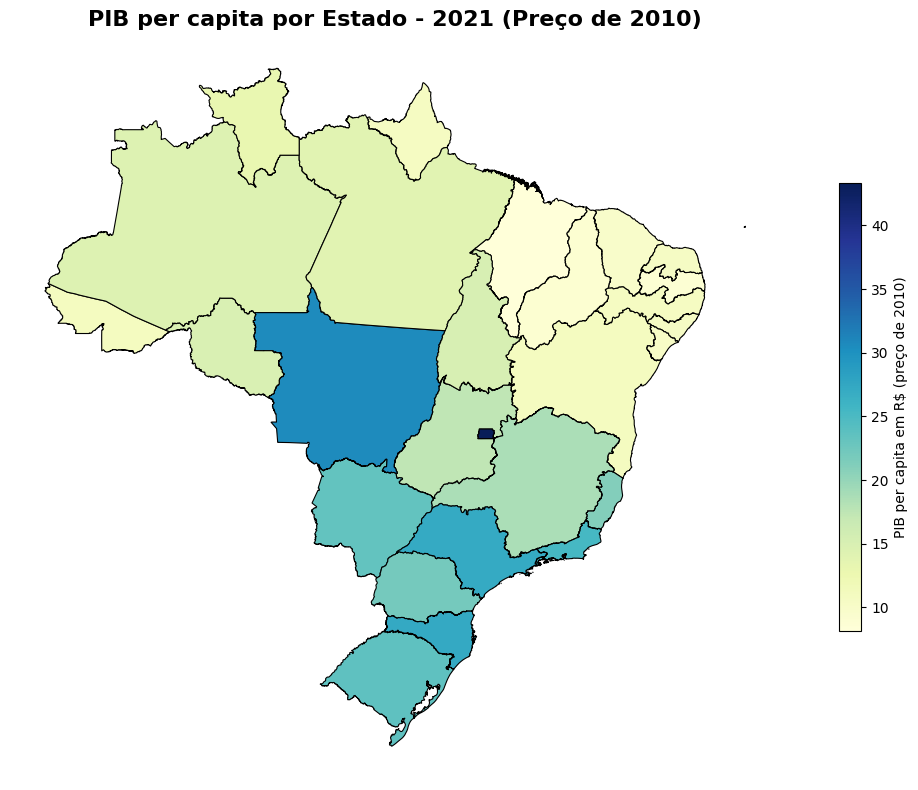

In [56]:
pib_per_capita['estado'] = pib_per_capita['estado'].str.strip().str.lower()

# Converter valores para float (substituindo vírgula por ponto, se necessário)
pib_per_capita['2021'] = pib_per_capita['2021'].str.replace(',', '.')
pib_per_capita['2021'] = pd.to_numeric(pib_per_capita['2021'], errors='coerce')

mapa = brasil_estados.merge(pib_per_capita, left_on='name', right_on='estado')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa.plot(column='2021', cmap='YlGnBu', linewidth=0.8, edgecolor='black', legend=True, ax=ax,
          legend_kwds={'label': 'PIB per capita em R$ (preço de 2010)', 'shrink': 0.6})

ax.set_title('PIB per capita por Estado - 2021 (Preço de 2010)', fontsize=16, fontweight='bold')
ax.axis('off')

plt.tight_layout()
plt.show()


